# ***Critical risk analysis of trading using algorithms like Black-Scholes, Random-Walk and comparison of those with TWAP, MACD strategy, through visual analysis***


***Date:			31.12.2022***

***Assessor(s): 		Refinitiv & Prof. Dr. Alexander Zureck(FOM Hochschule)***

## **Abstract**

***Our topic is regarding Critical risk analysis of intraday trading. We first heard of this from our Professor, hence we further looked into it and were intrigued. As my teammate once said that Generation Z wants everything to work fast and intraday trading caters to it. And that is where our motivation came from.***

 ***Stock trading broadly refers to any buying and selling of stock, but is colloquially used to refer to more shorter-term investments made by very active investors. Stock trading is a difficult and risky enterprise, but with education, you can work to lower risks and increase your likelihood of success.***

***With our project, we are trying to compare and see if we can get precise values with least error using famous algorithms like Black-Scholes and strategies TWAP and MACD for intraday traders.***

***Without further ado, let me take you through our problem statement and important pointers, our Dataset and progress so far.***


## **Table of Content**


*   **Problem Statement**

*   **Literature Review**

*   **Workflow**

*   **Model definition, data and analysis**

*   **Inference**

*   **Conclusion**

*   **Future line of work**





## **Introduction**

**The objective of any form of trading is to make profits. There is a need for critical risk analysis of any form of trading before a trader would dive into it. In theory, it should minimize the risk to achieve consistent gains.**

**There are different types of trading that you use to make profits. In this project we will analyze Intraday trading using a few algorithms/models and apply some strategies through visual analysis to make the best use of it.**

**Intraday trading is quite simply the process of purchasing and selling stocks on the same day before the market closes. The purpose here is not to invest per se, but to trade for quick gains by controlling the stock indices movement. Hence, the changes in the share prices are tracked closely to earn profits from stock trading.**


### **Problem statement**


**Analyzing trading using widely used algorithms like Black-Scholes, Rolling Volatility and comparison of those algorithms with the help of TWAP MCAD strategy.**


### **Research questions**



*   How much value do we put at risk by investing in a particular stock?
*   Which algorithm gives better results?

*   How will algorithms perform for trade?
*   Does TWAP work well for trade when compared to VWAM?

*   Finding VAR (Value at Risk) for the stocks.
*   Analyzing performance using MACD indicator strategy and identify entry and exit points.




*   See how good option trading is for intraday trades.




## **Literature Review**

**The Black-Scholes model, also called the Black-Scholes-Merton model, was developed by three economists—Fischer Black, Myron Scholes, and Robert Merton in 1973.(Vis-a-Vis Implied Volatility (February 21, 2002). Implied volatility is one of several components of the Black-Scholes formula, a mathematical model that estimates the pricing variation over time of financial instruments, such as options contracts. The five other inputs of the Black-Scholes model are the market price of the option, the underlying stock price, the strike price, the time to expiration, and the risk-free interest rate.The iterative search is one method using the Black-Scholes formula to calculate implied volatility.**


**The LSTM model, long short-term memory as the structure for predicting stock market returns for multiple forecast windows (Nabipour et al., 2020). Module has a cell state and three gates which provides them with the power to selectively learn, unlearn or retain information from each of the units.**

**The TWAP, time weighted average price is a trading indicator based on weighted average price that shows the average price of an instrument share as it rises and falls during a given time period.**

**Dooley & Schafar have worked on historical data from March 1975 to October 1975 trying to predict the next price direction based on seven different filter rules; they have proved that information about past exchange rate fluctuations is profitable when we use the correct filter rules. (Methods and Cases. Springer International Publishing, 2008.)**

**`Intraday trade:`**

---


Intraday trading means buying and selling stocks on the same trading day. 
Intraday trading is also known as Day Trading.
Advantages of Intraday Trading: avoid tangible risk in holding shares overnight and reading the pulse of the market.

---


**`Option trading:`**

---


It grants you the right but not the obligation to buy or sell an underlying asset at a set price on or before a certain date. 

---


**`European Option:`**

---


It is a version of an options contract that limits execution to its expiration date. 


## **Workflow**

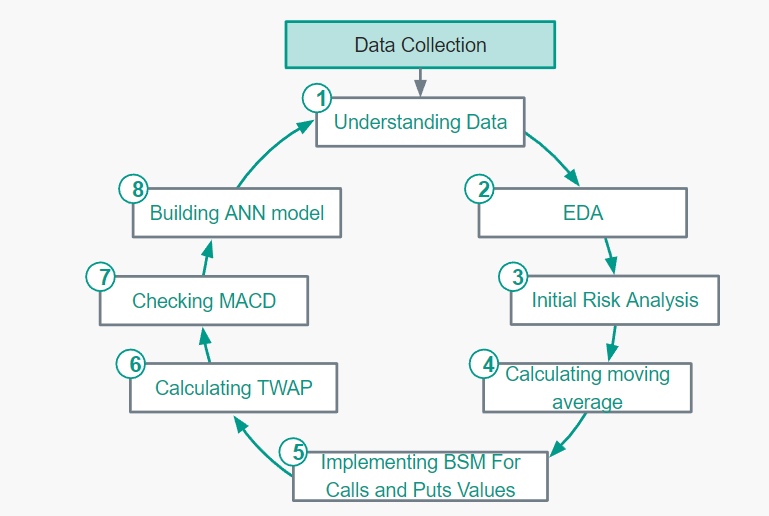

## **Model definition, data and analysis**

**Black-Scholes-Merton (BSM) model, is one of the most important concepts in modern financial theory. This mathematical equation estimates the theoretical value of derivatives based on other investment instruments, taking into account the impact of time and other risk factors. Is a differential equation widely used to price options contracts.**
**(Published by Mryon Scholes and Fischer Black in 1973).**


---
**It surely has a few assumptions:** 
*   Interest rate and Volatility are constant through time
*   Stock follows a random walk
*   Stock do not have transaction cost or pays dividends.
*   The option can be only executed at the expiration date.







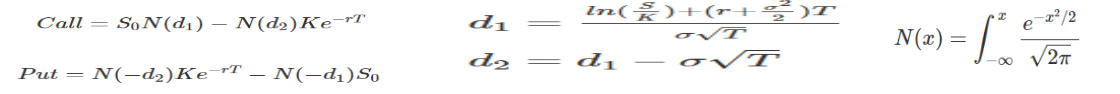

S : current asset price

K: strike price of the option

N: CDF of normal distribution(left to right)

r: risk free rate 

T : time until option expiration 

σ: annualized volatility of the asset's returns

d1: the factor by which the present value of change of the stock exceeds the current stock price.

d2: the risk-adjusted probability that the option will be exercised. 


In [ ]:
#Calculating the values of d1 and d2 as well as the calls and puts
N = norm.cdf
def BSM_CALLS(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)


**N: is the cumulative distribution function for a standard normal distribution shown below.**

In [ ]:
#Calculating the values of call
def BSM_PUTS(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1) 


**Volatility is a major factor in the price of an option. When thinking of volatility it is useful to think of it as the range of potential future stock prices. Since the holder of an option is interested in extreme values due to the fact that we are not obligated to buy the stock at expiration, both calls and puts will benefit from an increase in volatility.**

In [ ]:
#Calculating the values of puts
def implied_vol(opt_value, S, K, T, r, type_='call'):
  def call_obj(sigma):
    return abs(BSM_CALLS(S, K, T, r, sigma) - opt_value)
  #Calculating the values of volatility 
  def put_obj(sigma):
    return abs(BSM_PUTS(S, K, T, r, sigma) - opt_value)

**Implied volatility is the market's forecast of a likely movement in a security's price. It is a metric used by investors to estimate future fluctuations (volatility) of a security's price based on certain predictive factors.**

**Let's import the required libraries.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statsmodels

In [ ]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.21.6
Pandas version: 1.3.5
Seaborn version: 0.11.2
Sklearn version: 1.0.2
Statsmodels version: 0.12.2


## **Getting the Data**

**In this project we will get the stock options data from refinitiv. In order to do this we will use the eikon package. You can find installation steps below. The data we have got is for Apple, 10 years form 2012 to 2022 historical data and also Intraday data with 1 minutue interval.**

*Refinitiv on the future of trading - "Traders around the world find themselves having to adapt quickly to AI and emerging technologies, the move to automation, and the need to demonstrate best execution."*

In [ ]:
import eikon as ek
ek.set_app_key('Your ref key')

In [ ]:
df2 = ek.get_news_headlines('AAPL.O')
df2.shape

(10, 4)

In [ ]:
df = ek.get_timeseries('AAPL.O',start_date="2012-01-01",end_date="2022-12-31")

df

AAPL.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,302259098.259098
2012-01-04,14.809985,14.7657,14.617128,14.642843,56155,260244692.244692
2012-01-05,14.948199,14.929628,14.7382,14.819628,58360,271267491.267491
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,318385966.385966
2012-01-09,15.27677,15.061771,15.048199,15.196417,80332,394023562.023562
...,...,...,...,...,...,...
2022-12-23,132.415,131.86,129.64,130.92,541275,63814893.0
2022-12-27,131.41,130.03,128.72,131.38,608331,69007830.0
2022-12-28,131.0275,126.04,125.87,129.67,762246,85438391.0


In [ ]:
df3 = ek.get_timeseries('AAPL.O',start_date="2012-10-01",end_date="2022-12-31", interval='minute')

df3

AAPL.O,HIGH,LOW,OPEN,CLOSE,COUNT,VOLUME
Date,,,,,,
2022-10-17 16:24:00,141.6,141.411255,141.4988,141.56,884,97939
2022-10-17 16:25:00,141.61,141.53,141.55,141.595,981,104902
2022-10-17 16:26:00,141.6,141.504878,141.595,141.565,642,54813
2022-10-17 16:27:00,141.69,141.5601,141.5601,141.69,1111,130477
2022-10-17 16:28:00,141.74,141.553589,141.69,141.7192,947,96638
...,...,...,...,...,...,...
2022-12-30 23:56:00,130.04,130.02,130.04,130.04,8,120
2022-12-30 23:57:00,130.05,130.01,130.04,130.04,10,1450
2022-12-30 23:58:00,130.05,130.01,130.01,130.03,9,34


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2764 non-null   datetime64[ns]
 1   HIGH    2764 non-null   float64       
 2   CLOSE   2764 non-null   float64       
 3   LOW     2764 non-null   float64       
 4   OPEN    2764 non-null   float64       
 5   COUNT   2764 non-null   int64         
 6   VOLUME  2764 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.3 KB


**`Data Shape:`**

(2764, 6) That is it has 2764  rows and 6 columns.


In [ ]:
#setting up the index
df.set_index(keys='Date',inplace=True)

In [ ]:
df.head()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08
2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08
2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,3.183860e+08
2012-01-09,15.276770,15.061771,15.048199,15.196417,80332,3.940236e+08


**`Data Dictionary:`**

HIGH - Highest value of stock in a day.

CLOSE - Closing price of the day.

LOW - Lowest price on the day.

OPEN - Open day price

COUNT - Count of stocks.

VOLUME - Volume of stock trade for the day.


In [ ]:
df['CLOSE'].describe()

count    2764.000000
mean       58.535662
std        47.946462
min        13.947486
25%        24.158119
50%        37.611250
75%        77.183125
max       182.010000
Name: CLOSE, dtype: float64

**The output gives a of all the numeric variables in the dataset for Apple Stocks. 
Also according to the analysing Closing value of stock per day. We see the mean price to be \$58.5.**

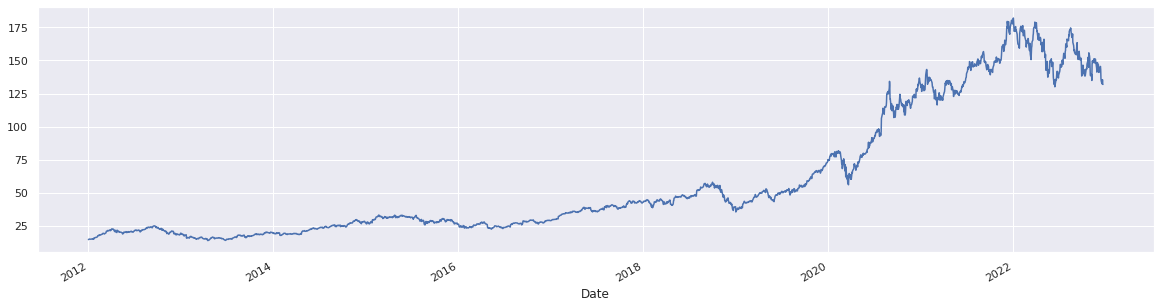

In [ ]:
# The following code is to set to show the flow

from pylab import rcParams
rcParams['figure.figsize'] = 20,5
df['CLOSE'].plot(grid=True)

**A good thing for our model is that for now the min and max for our data is positive.**

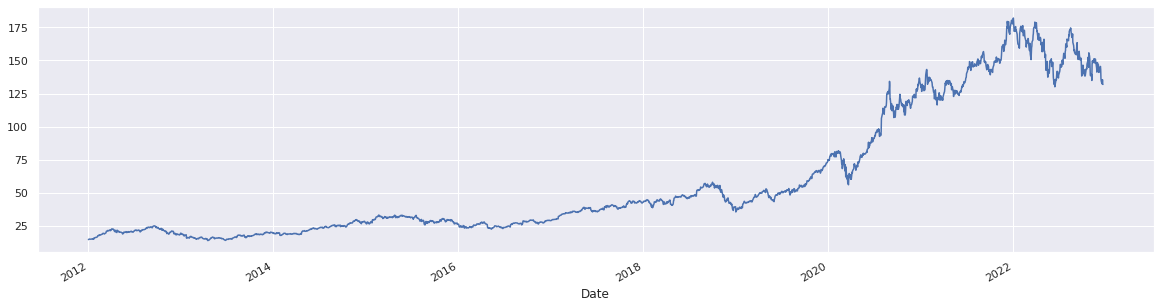

In [ ]:
# The following code is to set to show the flow

from pylab import rcParams
rcParams['figure.figsize'] = 20,5
df['CLOSE'].plot(grid=True)

**A good thing for our model is that for now the min and max for our data is positive.**

***Moving average (MA)***

A moving average is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. They are 3 types the 10 moving average, the 20 moving average and the 50 moving average. In our case we will use the short term, also know as 10MA.

In [ ]:
# Moving average using closing price and volume
# Calculate moving average
def moving_avg(M):
  arr = df['CLOSE'].to_numpy()
  ma = M  
  i = 0
  # Initialize an empty list to store moving averages
  moving_averages = []
  
  # Loop through the array to consider
  # every window of size 10
  while i < len(arr):
    
    # Store elements from i to i+ma in list to get the current window
    window = arr[i : i + ma]
  
    # Calculate the average of current window
    window_average = round(sum(window) / ma, 2)
      
    # Store the average of current window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
  return moving_averages

**Considering only trading days, eg, 252 for 365 days in a year and 21 each month. Taking MA for 365, 30, 120, 240 days.**

Text(0.5, 1.0, 'APPLE moving average')

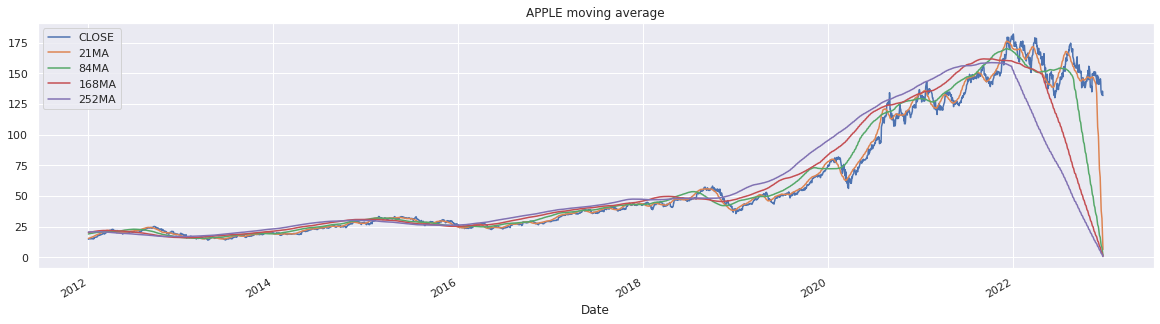

In [ ]:
df['21MA'] = moving_avg(21)
df['84MA'] = moving_avg(84)
df['168MA'] = moving_avg(168)
df['252MA'] = moving_avg(252)
df[['CLOSE', '21MA',	'84MA',	'168MA',	'252MA'	]].plot().set_title('APPLE moving average')

Text(0.5, 1.0, 'APPLE moving average')

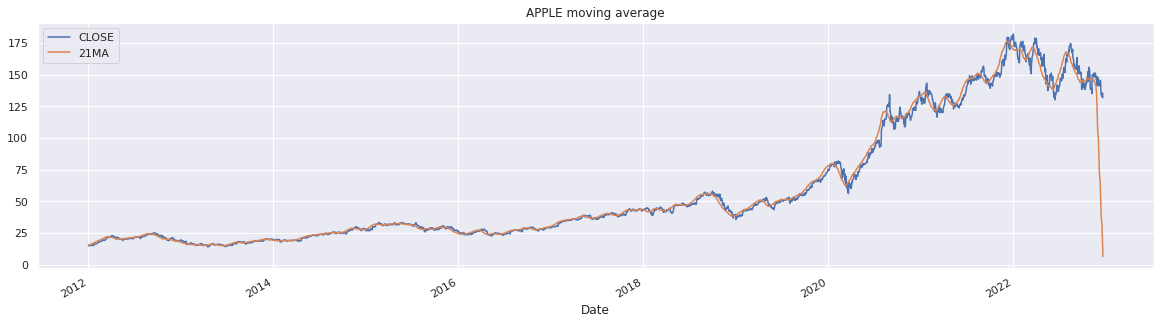

In [ ]:
df[['CLOSE','21MA'	]].plot().set_title('APPLE moving average')

**The 21 days moving average gives us a clear trend without much noice, however if we cosider this it also means that a change is excepted after 21/2, days lag. We will move on with 21 pallet as based for each month for 10 years data we have.** 

**We will try to handle this lag later as we move on with EMA.**

**`Changes in the price`.** **Let's calculate returns on our closing prices.**

**Changes in the price.** Let's calculate returns on our closing prices.

In [ ]:
#Getting daliy return rates
df['returns'] = np.log(df['CLOSE']/df['CLOSE'].shift())

Text(0.5, 1.0, 'APPLE returns every day')

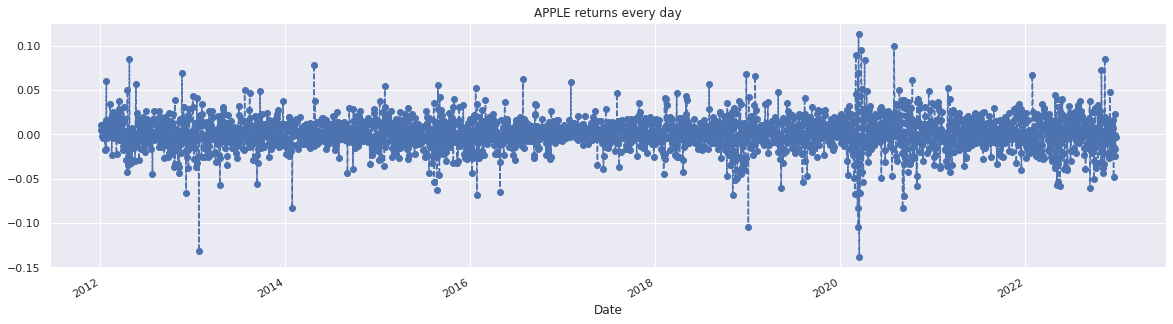

In [ ]:
df['returns'].plot(linestyle='--', marker='o').set_title('APPLE returns every day')

**We see that for the apple the changes 10% to low 15% over the years. Mostly between 5% on either sides.** 

**Let's see the disribution to understand the point better.**

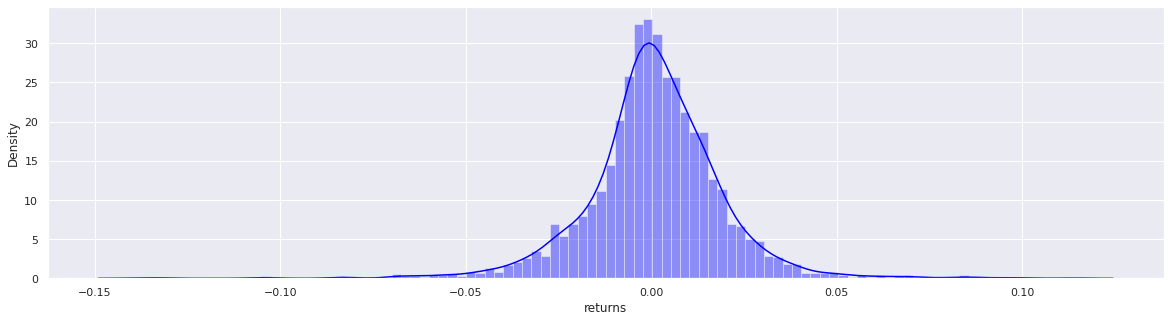

In [ ]:
sns.distplot(df['returns'].dropna(), bins=100, color='blue')

In [ ]:
print("Skewness: %f" % df['returns'].skew())
print("Kurtosis: %f" % df['returns'].kurt())

Skewness: -0.277015
Kurtosis: 5.790824


**We get a normal distribution, mostly within 5%**

**The rolling volality for the same on 21 days span over 252  trading days.**



In [ ]:
df['Rolling_volatility'] = df['returns'].dropna().rolling(21).std()*np.sqrt(252)

Text(0.5, 1.0, 'Apple Rolling Volatility over Price')

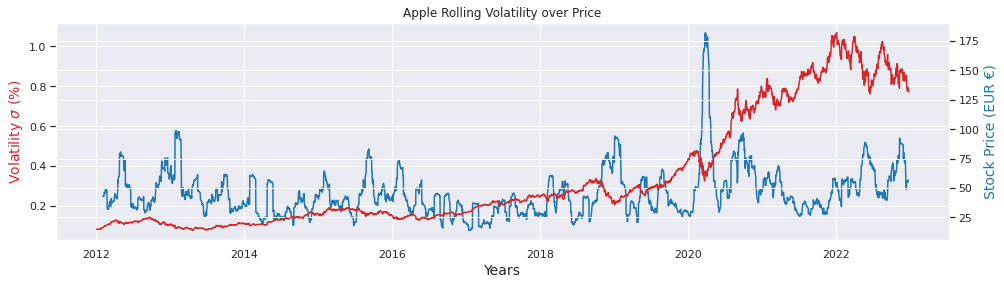

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(df['Rolling_volatility'], color='tab:blue')
ax2=ax.twinx()
ax2.plot(df['CLOSE'], color='tab:red')
ax.set_ylabel("Volatility $\sigma$ (%)", color="tab:red", fontsize=14)
ax2.set_ylabel("Stock Price (EUR €)",color="tab:blue",fontsize=14) 
ax.set_xlabel("Years", fontsize = 14)
plt.title('Apple Rolling Volatility over Price')

 ***Point data we have, our rolling volatility over the 21 days by year, approximately 252 trading days.* We see that expecpt for 2020 7% rise, volatility is ranging between 1-4%.**

**We will next use random walk to create our strike price list and values.**

**Random walk theory suggests that changes in stock prices have the same distribution and are independent of each other. Therefore, we will use it for black Scholes stock follows a random walk request.**

Expected price:  132.2
5% lower limit:  77.01266064646805
5% upper limit:  206.12654050117598


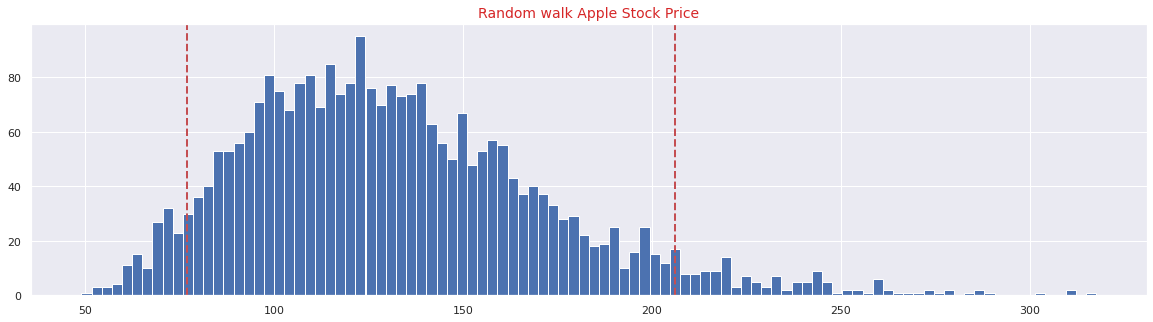

In [ ]:
max_iterations =  df.shape[0] # iteration same as record value
randomwalk = pd.DataFrame()
last_price_list = [] # the list to store strike price
last_price = df['CLOSE'][-1] # just using the last closing.

for i in range(max_iterations):
    count = 0
    price_list = []
    price = last_price * (1 + np.random.normal(0, df.returns.std()))
    price_list.append(price) 

    for y in range(T): # no.of days T
        if count == 252: # geting the price for 252 records
            break
        price = price_list[count]* (1 + np.random.normal(0, df.returns.std())) # getting price value by multipling it with daliy volatility.
        price_list.append(price)
        count += 1
        
    randomwalk[i] = price_list
    last_price_list.append(price_list[-1])
      
print("Expected price: ", round(np.mean(last_price_list),2))
print("5% lower limit: ",np.percentile(last_price_list,5))
print("5% upper limit: ",np.percentile(last_price_list,95))
plt.hist(last_price_list,bins=100)
plt.axvline(np.percentile(last_price_list,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(last_price_list,95), color='r', linestyle='dashed', linewidth=2)
plt.title("Random walk Apple Stock Price",color="tab:red",fontsize=14) 
plt.show()

**We have the strick price as 132.2 year-end and there is a 5% changes for it going lower than 79 and 5% it goes above 206**

In [ ]:
df['Ran_Price'] = pd.DataFrame(last_price_list).values
df.head(3)

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME,CLOSE_log,21MA,84MA,168MA,252MA,returns,Rolling_volatility,Ran_Price
Date,,,,,,,,,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08,2.686947,15.35,18.93,20.11,20.56,NaN,NaN,110.383272
2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08,2.692307,15.43,19.00,20.16,20.58,0.005360,NaN,136.576686
2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08,2.703348,15.51,19.06,20.22,20.60,0.011041,NaN,112.257646



**How much value do we put at risk by investing in apple?**



Text(0.5, 1.0, 'APPLE risk')

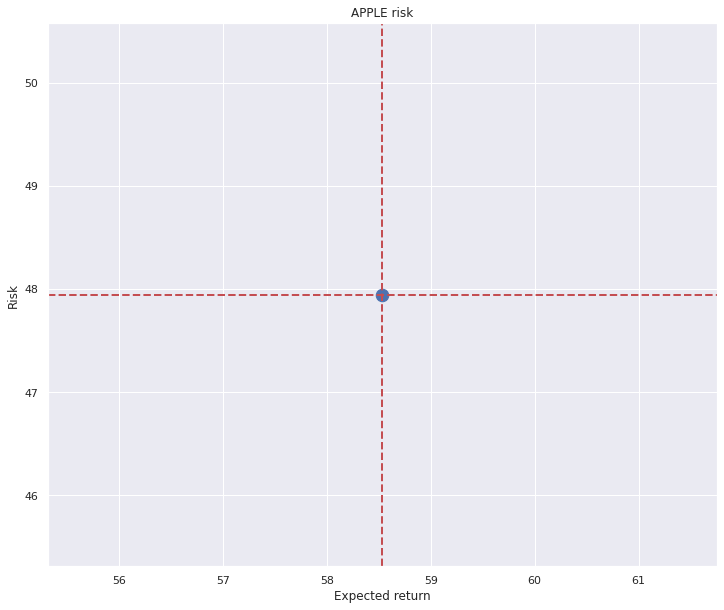

In [ ]:
#mean v/s std for returns
rets = df['CLOSE'].dropna()
area = np.pi*50
#plotting the area
plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area) 
plt.axhline(rets.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(rets.mean(), color='r', linestyle='dashed', linewidth=2)
plt.grid(True)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('APPLE risk')

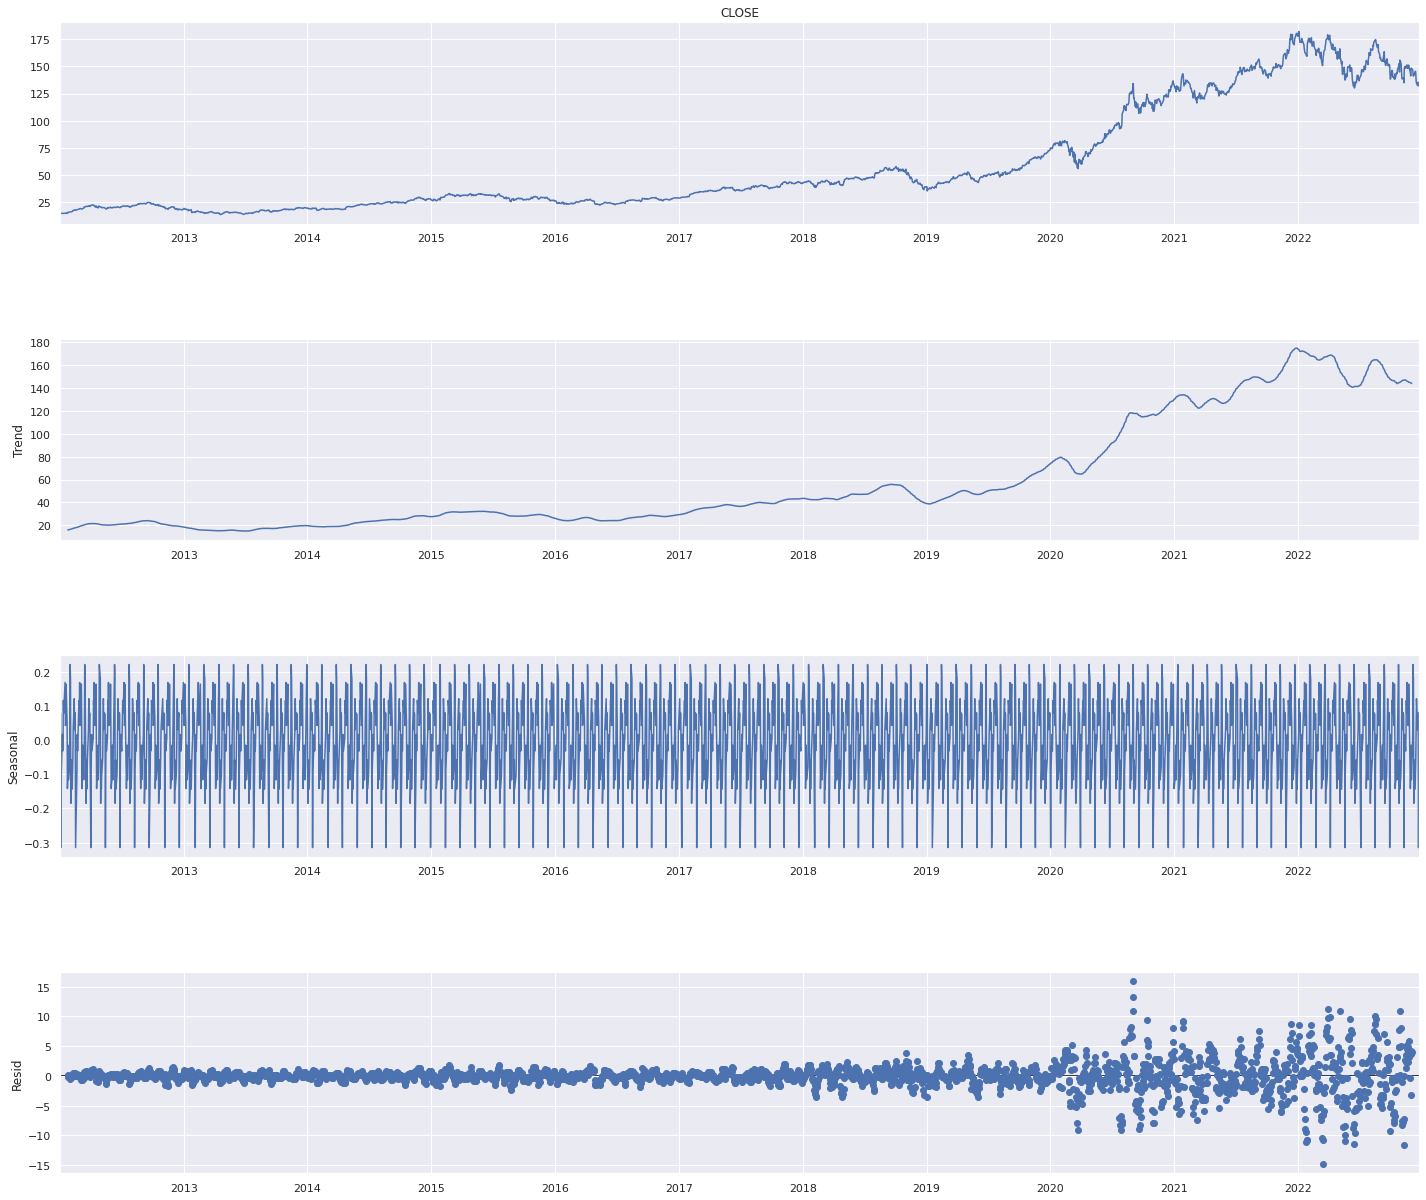

In [ ]:
result = seasonal_decompose(df['CLOSE'], model='additive', period = 30)
fig = result.plot()  
fig.set_size_inches(20, 19)

**We can see a clear seasonality and rising trend and and high residual at the 2020-2022 span.**

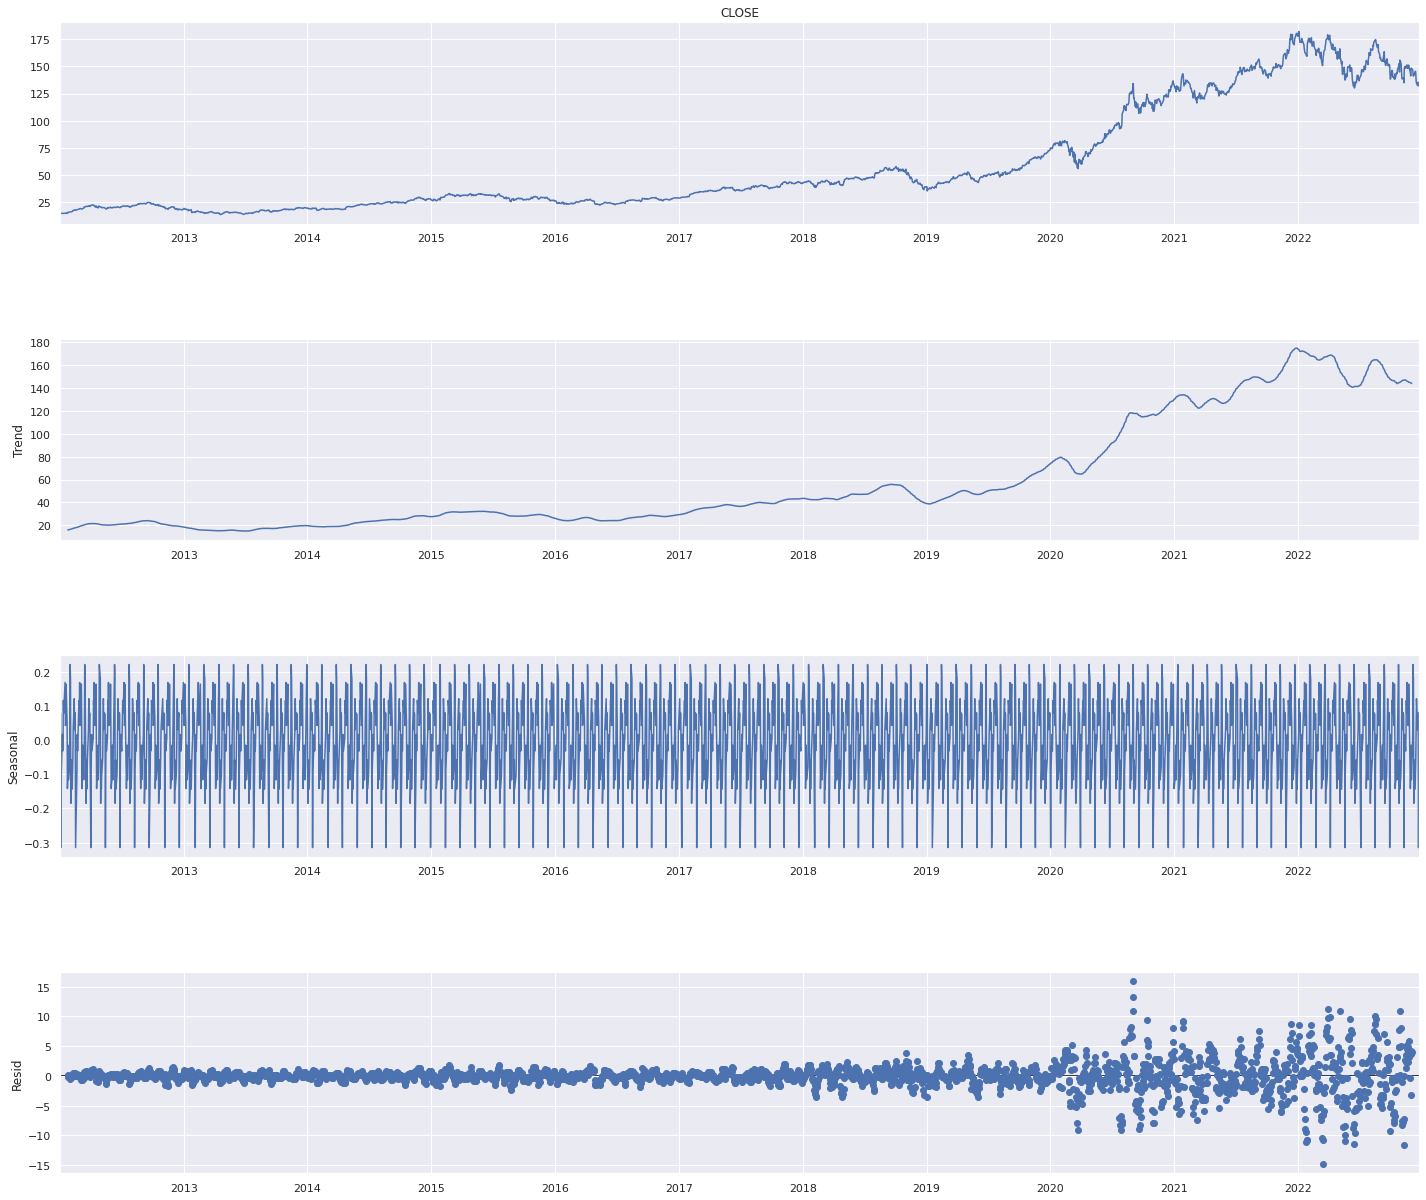

In [ ]:
result = seasonal_decompose(df['CLOSE'], model='additive', period = 30)
fig = result.plot()  
fig.set_size_inches(20, 19)

**We can see a clear seasonality and rising trend and and high residual at the 2020-2022 span.**

**Going into the equation itself we see that the model gives out two important outputs and call and put values.**

**In order to get call, risk-adjusted strike price  at the time of expiry, i.e N(d2)K e-rt is detected from the current asset price after taking into account the variance through normal distribution. I.e S0N(d1)**

**In the same way to get put., we deduct the current asset price with variance from risk-adjusted strike price at the time of expiry but this time from the negative end of the distribution spectrum.**


**Our implied volatility call is at 44.99%. We can use this as a iniating point for BSM model. And our Random price mean.**

In [ ]:
S = 132.61
K = 115
T = 21
r = 0.05
sigma = 0.45

C = BSM_CALLS(S, K, T, r, sigma)
P = BSM_PUTS(S, K, T, r, sigma)
iv = implied_vol(C, S, K, T, r)
print(iv)

0.44999817460062475


**Calling for BSM model for CLOSE Price and our Random Price calcuated before to get implied volatility for call and put values for both.**

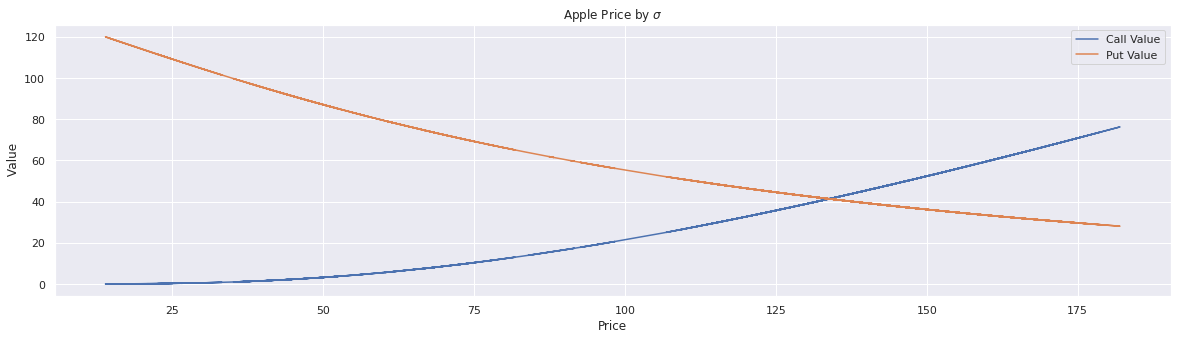

In [ ]:
K = 135
r = 0.15
T = 21/365
sigma = 3.31

S = df['CLOSE'].to_numpy()

calls = [BSM_CALLS(s, K, T, r, sigma) for s in S]
puts = [BSM_PUTS(s, K, T, r, sigma) for s in S]

plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('Price')
plt.ylabel(' Value')
plt.title('Apple Price by $\sigma$')
plt.legend()

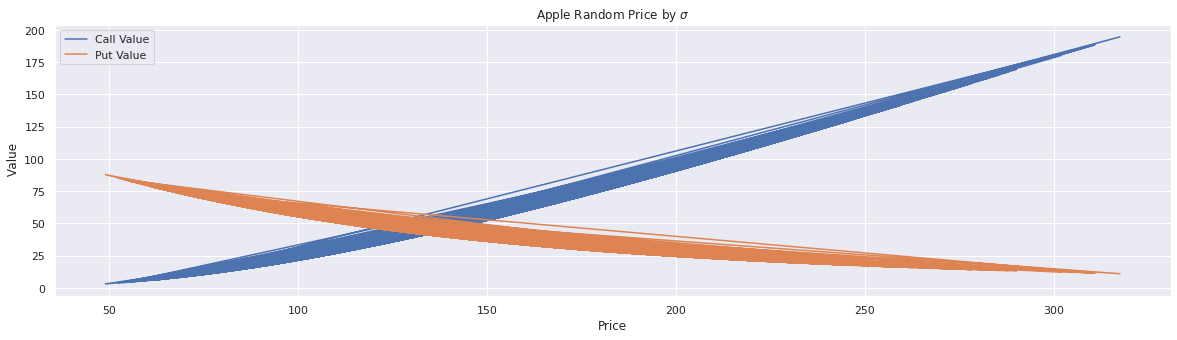

In [ ]:
K = 135
r = 0.15
T = 21/365
sigma = 3.31

S = df['Ran_Price'].to_numpy()

call = [BSM_CALLS(s, K, T, r, sigma) for s in S]
put = [BSM_PUTS(s, K, T, r, sigma) for s in S]

plt.plot(S, call, label='Call Value')
plt.plot(S, put, label='Put Value')
plt.xlabel('Price')
plt.ylabel(' Value')
plt.title('Apple Random Price by $\sigma$')
plt.legend()

 **We get the volatility smile here with our data and our random price set. The volatility smile is related to the fact that options at different strikes have different levels of implied volatility. It is calculated implied volatility using Newton's method** 

**Newton's method is a method for finding increasingly improved approximations to the roots of a function. With implied volatility we're trying to find what value of σ makes our option price.**

**If we have a function f(x) and its derivative f′(x) we can start with an initial guess and successively improve it with an updated guess by doing:**

**`xn+1=xn−f(xn)f′(xn)`**

**To find the implied volatility, the root we want to find is where our Black-Scholes price matches the market price to some level of precision. We can express that like:**





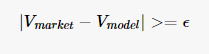

**Where ϵ is the level of precision and Vmarket is the market price for the option.**

**Here, our f(x) function is the Black-Scholes equation for pricing an option:**

**`Vmodel=f(x)=BSM(σ)`**


Newton's method is a method for finding increasingly improved approximations to the roots of a function. With implied volatility we're trying to find what value of σ makes our option price.

If we have a function f(x) and its derivative f′(x) we can start with an initial guess and successively improve it with an updated guess by doing:

xn+1=xn−f(xn)f′(xn)
To find the implied volatility, the root we want to find is where our Black-Scholes price matches the market price to some level of precision. We can express that like:





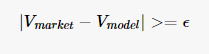

Where ϵ is the level of precision and Vmarket is the market price for the option.

Here, our f(x) function is the Black-Scholes equation for pricing an option:

Vmodel=f(x)=BSM(σ)


In [ ]:
S = 100
K = 100
r = 0.15
T = 30/365
sigma = 0.17 

C = df['calls'].to_numpy()
P = df['puts'].to_numpy()
implied_volatility_call = [implied_volatility_call(C, S, K, T, r) for c in C]
implied_volatility_put = [implied_volatility_put(P, S, K, T, r) for p in P]

**`Call option`**

A call option is the right to buy an asset at a predetermined price.  
 

**`Put Option`**

A put option is the right to sell and asset at a predetermined price. 

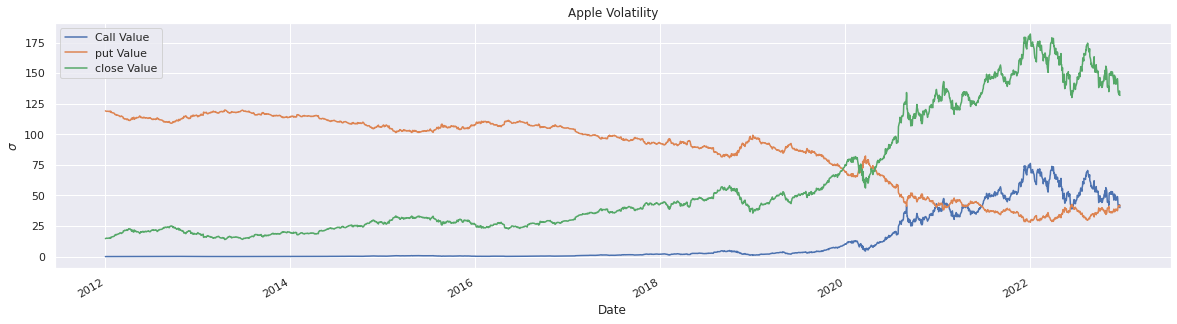

In [ ]:
df.calls.plot(label='Call Value')
df.puts.plot(label='put Value')
df.CLOSE.plot(label='close Value')
plt.ylabel('$\sigma$')
plt.title('Apple Volatility')
plt.legend()

**We can see that the call value closes follows the Price and Put goes down then Price goes up.** 

**Next is MCAD, to understand it we needed to know EMA, i.e what it does is by averaging, it gives more value to recent data,, than the ones that are at a distance..**

**Components of MACD**
*To get MACD line we subtract a longer period EMA by a shorter one. For example I have a 10 days EMA and 50 Days EMA, we will do a 10-50.
Signal Line is nothing but the EMA line.*

Here we range it within 11 to 21 days

In [ ]:
# MACD parameters
short_period = 12
long_period  = 21
signal_period = 9

In [ ]:
#Exponential Moving Average (EMA)
ewm_short=df['CLOSE'].ewm(span=short_period, adjust=False).mean() 
# getting the short term value
ewm_long=df['CLOSE'].ewm(span=long_period, adjust=False).mean() 
# getting the long term value 1 month trading

In [ ]:
#Moving average convergence/divergence value
MACD=ewm_short-ewm_long 
#Moving average convergence/divergence signal will use to know when to trade
signal_MACD=MACD.ewm(span=signal_period, adjust=False).mean() 

**The TWAP, time weighted average price is a trading indicator based on weighted average price that shows the average price of an instrument share as it rises and falls during a given time period.**

**Is the average price of an asset over a specified time. TWAP is calculated by averaging the entire day’s price bar, i.e., open, high, low, and close prices of the day. Advantages of TWAP: TWAP signals cover a considerable amount of risk with their calculations.** 

In [ ]:
# Create TWAP function
def TWAP(dataframe): #all variables added to take average
    tp = (df['LOW'] + df['CLOSE'] + df['HIGH']+ df['VOLUME']).divide(4) #Average of each day’s price = (Open + High + Low + Close)/4
    return df.assign(twap=(tp.rolling(1).sum().divide(1))) 
twap_df = TWAP(df)
df['TWAP'] = twap_df['twap']

**The volume-weighted average price (VWAP) is a measurement that shows the average price of a security, adjusted for its volume. It is calculated during a specific trading session by taking the total dollar value of trading in the security and dividing it by the volume of trades. The formula for calculating VWAP is cumulative typical price x volume divided by cumulative volume.**

In [ ]:
df['VWAP'] = (df.CLOSE * df.VOLUME).cumsum() / df.VOLUME.cumsum()

In [ ]:
df['VWAP'] = (df.CLOSE * df.VOLUME).cumsum() / df.VOLUME.cumsum()

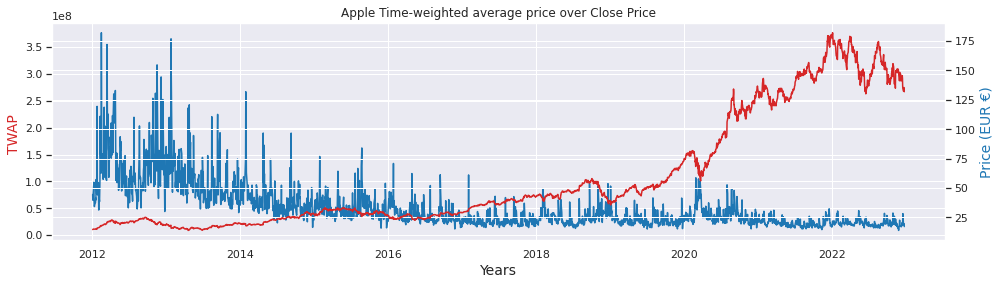

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(df['TWAP'], color='tab:blue')
ax2=ax.twinx()
ax2.plot(df[['CLOSE']], color='tab:red')
ax.set_ylabel("TWAP ", color="tab:red", fontsize=14)
ax2.set_ylabel("Price (EUR €)",color="tab:blue",fontsize=14) 
ax.set_xlabel("Years", fontsize = 14)
plt.title('Apple Time-weighted average price over Close Price')
plt.show()

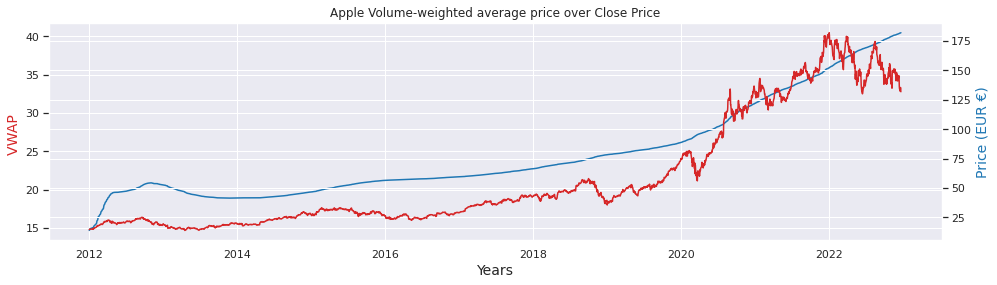

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(df['VWAP'], color='tab:blue')
ax2=ax.twinx()
ax2.plot(df[['CLOSE']], color='tab:red')
ax.set_ylabel("VWAP ", color="tab:red", fontsize=14)
ax2.set_ylabel("Price (EUR €)",color="tab:blue",fontsize=14) 
ax.set_xlabel("Years", fontsize = 14)
plt.title('Apple Volume-weighted average price over Close Price')
plt.show()

**As we can see here they have a almost co-relation, where as VWAP is inlice with the price model**

In [ ]:
df['VWAP'] = (df.CLOSE * df.VOLUME).cumsum() / df.VOLUME.cumsum()

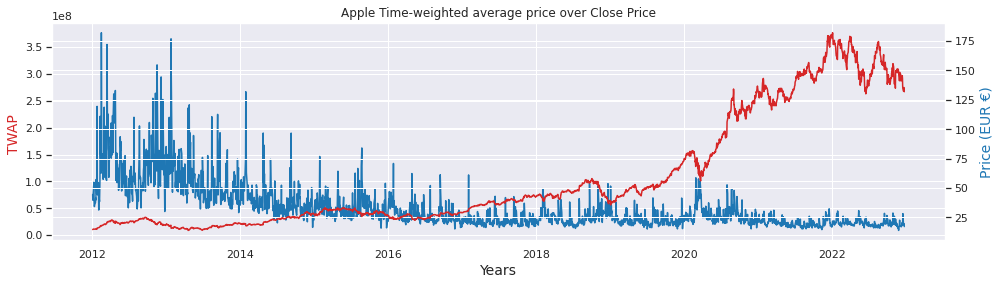

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(df['TWAP'], color='tab:blue')
ax2=ax.twinx()
ax2.plot(df[['CLOSE']], color='tab:red')
ax.set_ylabel("TWAP ", color="tab:red", fontsize=14)
ax2.set_ylabel("Price (EUR €)",color="tab:blue",fontsize=14) 
ax.set_xlabel("Years", fontsize = 14)
plt.title('Apple Time-weighted average price over Close Price')
plt.show()

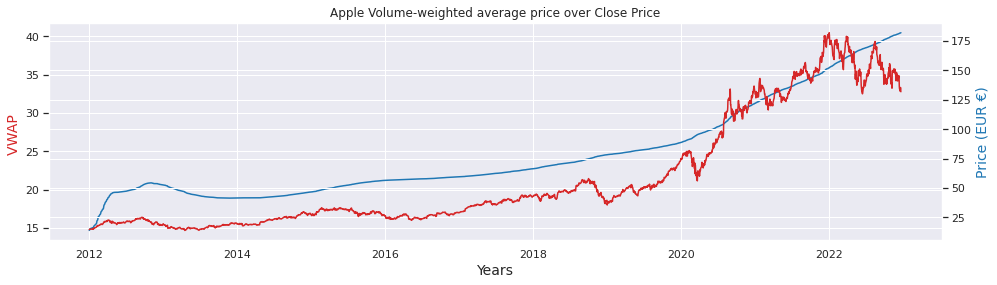

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(df['VWAP'], color='tab:blue')
ax2=ax.twinx()
ax2.plot(df[['CLOSE']], color='tab:red')
ax.set_ylabel("VWAP ", color="tab:red", fontsize=14)
ax2.set_ylabel("Price (EUR €)",color="tab:blue",fontsize=14) 
ax.set_xlabel("Years", fontsize = 14)
plt.title('Apple Volume-weighted average price over Close Price')
plt.show()

**As we can see here they have a almost co-relation, where as VWAP is inlice with the price model**

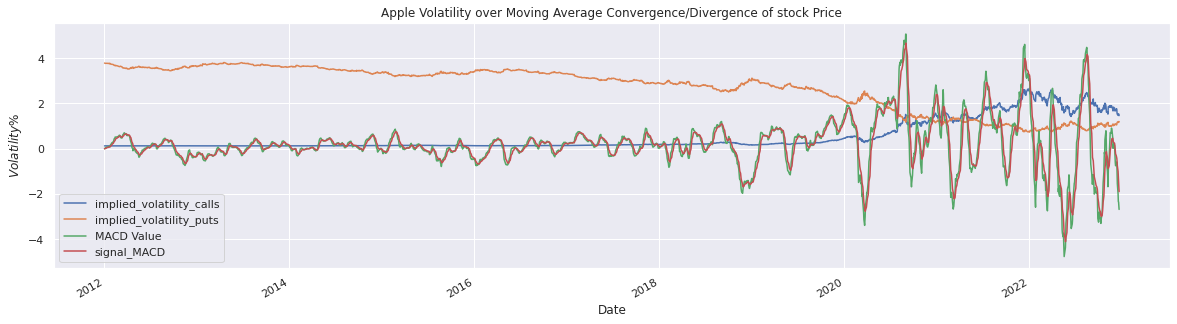

In [ ]:
df.implied_volatility_calls.plot(label='implied_volatility_calls')
df.implied_volatility_puts.plot(label='implied_volatility_puts')
df.MACD.plot(label='MACD Value')
df.signal_MACD.plot(label='signal_MACD') 
plt.ylabel('$Volatility \%$')
plt.title('Apple Volatility over Moving Average Convergence/Divergence of stock Price')
plt.legend() 

**`MACD Strategy:`**
*   **`IF MACD LINE > SIGNAL LINE => BUY THE STOCK`**
*   **`IF SIGNAL LINE > MACD LINE => SELL THE STOCK`**




**A Sequential model is a plain stack of layers where each layer has exactly one input tensor and one output tensor.**

In [ ]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, SimpleRNN,LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = df[['CLOSE']].values
df = df.reshape(-1, 1)

**We are currently giving the price value into the model, but any other value can also be given or more than one varible depending on the need can be added.**

### **MinMaxScaler**

Min-max scaling is similar to z-score normalization in that it will replace every value in a column with a new value using a formula. In this case, that formula is:

 **`m = (x -xmin) / (xmax -xmin)`**

 For our data scaling we are using Min- max scaler function.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

**Splitted the data into train and test (80:80). Applied sequential model in LSTM, ANN.**

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections.**

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(Dropout(0.2)) #Making the dropout fraction 0.2 drops 20% of the layers.
model.add(LSTM(units=96,return_sequences=True)) #sequential one with 96 units in the output’s dimensionality
model.add(Dropout(0.2)) 
#sequential_3 which is expecting 3 dimensions, adding layers
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

We have initialized our model as a sequential one with 96 units in the output’s dimensionality. We used return_sequences=True to make the LSTM layer.

Making the dropout fraction 0.2 drops 20% of the layers.

After that, we want to reshape our feature for the LSTM layer, because it is sequential_3 which is expecting 3 dimensions, not 2:

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('app_stock_pred.h5')

Epoch 1/50
68/68 [==============================] - 18s 166ms/step - loss: 0.0274
Epoch 2/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0233
Epoch 3/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0231
Epoch 4/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0230
Epoch 5/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0233
Epoch 6/50
68/68 [==============================] - 13s 184ms/step - loss: 0.0232
Epoch 7/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0228
Epoch 8/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0227
Epoch 9/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0234
Epoch 10/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0227
Epoch 11/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0228
Epoch 12/50
68/68 [==============================] - 11s 168ms/step - loss: 0.0227
Epoch 13/50
6

We have initialized our model as a sequential one with 96 units in the output’s dimensionality. We used return_sequences=True to make the LSTM layer.

Making the dropout fraction 0.2 drops 20% of the layers.

After that, we want to reshape our feature for the LSTM layer, because it is sequential_3 which is expecting 3 dimensions, not 2:

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('app_stock_pred.h5')

Epoch 1/50
68/68 [==============================] - 18s 166ms/step - loss: 0.0274
Epoch 2/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0233
Epoch 3/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0231
Epoch 4/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0230
Epoch 5/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0233
Epoch 6/50
68/68 [==============================] - 13s 184ms/step - loss: 0.0232
Epoch 7/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0228
Epoch 8/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0227
Epoch 9/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0234
Epoch 10/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0227
Epoch 11/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0228
Epoch 12/50
68/68 [==============================] - 11s 168ms/step - loss: 0.0227
Epoch 13/50
6

**Loss (L).** Measure of how far a model’s predictions are from its label. Metric that represents how good/bad a model is. Objective is to find a set of weights and biases that minimize loss. To determine loss, a model defines a loss function. Linear regression models typically use mean squared error while logistic regression models use Log Loss, for loss function.

**Each epoch refers to one cycle through the full training dataset, and batch size refers to the number of training examples utilized in one iteration.**

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 96)            37632     
                                                                 
 dropout_4 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_5 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_6 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_7 (LSTM)               (None, 96)               

**For the first layer we have additional bias term 37632, followed by 74112 there after, hence we have a good working model with high capacity.**

**Accuracy. Calculates the percentage of predicted values (x_test) that match actual values of Close Price.**

We have initialized our model as a sequential one with 96 units in the output’s dimensionality. We used return_sequences=True to make the LSTM layer.

Making the dropout fraction 0.2 drops 20% of the layers.

After that, we want to reshape our feature for the LSTM layer, because it is sequential_3 which is expecting 3 dimensions, not 2:

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('app_stock_pred.h5')

Epoch 1/50
68/68 [==============================] - 18s 166ms/step - loss: 0.0274
Epoch 2/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0233
Epoch 3/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0231
Epoch 4/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0230
Epoch 5/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0233
Epoch 6/50
68/68 [==============================] - 13s 184ms/step - loss: 0.0232
Epoch 7/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0228
Epoch 8/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0227
Epoch 9/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0234
Epoch 10/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0227
Epoch 11/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0228
Epoch 12/50
68/68 [==============================] - 11s 168ms/step - loss: 0.0227
Epoch 13/50
6

**Loss (L).** Measure of how far a model’s predictions are from its label. Metric that represents how good/bad a model is. Objective is to find a set of weights and biases that minimize loss. To determine loss, a model defines a loss function. Linear regression models typically use mean squared error while logistic regression models use Log Loss, for loss function.

**Each epoch refers to one cycle through the full training dataset, and batch size refers to the number of training examples utilized in one iteration.**

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 96)            37632     
                                                                 
 dropout_4 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_5 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_6 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_7 (LSTM)               (None, 96)               

**For the first layer we have additional bias term 37632, followed by 74112 there after, hence we have a good working model with high capacity.**

**Accuracy. Calculates the percentage of predicted values (x_test) that match actual values of Close Price.**

16/16 [==============================] - 2s 38ms/step


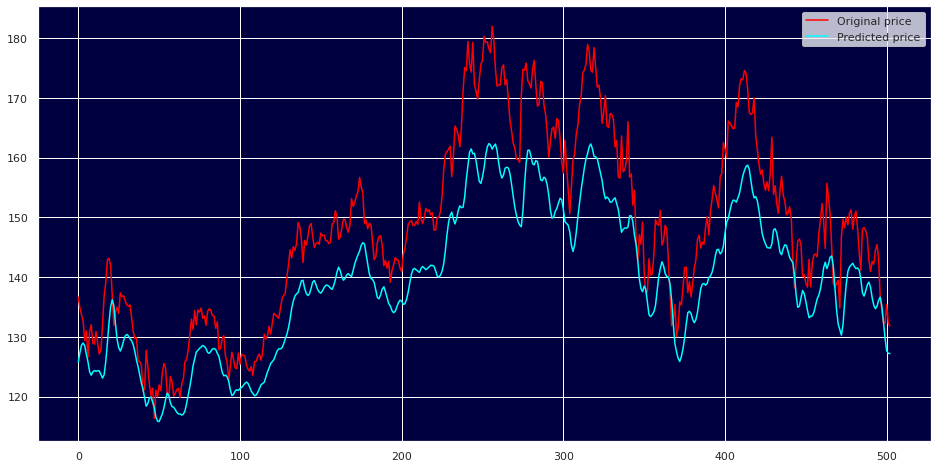

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

## **Inference:**

**A very good prediction result!  We build the ANN to get the max precision value and least error.**

**Change layers, numbers, epochs, and batch_size, will update the prediction and more accurate.**

**Compare this number to the one we calculated using the brute force approach, they are effectively identical. ANN is better accuracy but not speed as hoped, but BSM does. You can verify this number is correct by plugging the imp_vol back into the Black-Scholes formula.**

 

**It took approximately 0.002 seconds when I ran the BSM snippet, comparing this to 5 seconds it took when using the brute force approach. Consider again calculating the implied volatility for 1000 options using both approaches; using Newton Raphson we would be finished in 2 seconds in comparison to well over an hour for brute force approach. A significant increase in speed!**

## **Conclusion**

**The Random price we get small loss and were able to get a very predication, we have made the model so it can take in any variable, currently Price is the one we used. The models give us around 50 or close to 50% accuracy for both test and train model, though it still needs to be improved, and can be done by tuning.**


**TWAP indicator would take trainging and more data for mastering the result with less error, however it can be further imporved to become a vital tool for day traders to have a clear picture and the best conditions to make an informed decision.**

**In the case of our mode the loss is very low, hence it can be used and further imporved.**


**We were able to use EMA too fix the day lag with rolling volality and BSM model gave the result in 3 itermations, BSM is still faster than ANN.**


**Through out thr project and the differnt algorithm we see that as the volality increases the risk also is higher.**


**As in the case of Apple the volality is not hiigher than 5%, hence the overall tarding risk is also low. We were able to train the model using 1 hour interval years data. However futher test can also be done with different intervals 5, 10, 20 minutes to see the changes.**

## **Future Line of work.**

**We were able recommend the use of GRU's or GARCH forecasts for solution to short-term memory as intraday data. That could be the next step for our project. Getting more data and training algorithms for fine tunning the final results**

For furture work you can find the code file here: https://github.com/DinyaAntony/portfolio.github.io/tree/Pro_hack

## **Bibliography**



*   Sahadev, Keshav and Ward, Mike and Muller, Chris, A Volume-Weighted-Average-Price (VWAP) Method for Estimating Beta in the Context of Reference-Day Risk. (February 14, 2018). Available at SSRN: https://ssrn.com/abstract=3123725 or http://dx.doi.org/10.2139/ssrn.3123725
*   




*   Implied volatility provides better forecasts of financial volatility than time-series models based on historical daily returns.
Martens, Martin P.E. and Zein, Jason, Predicting Financial Volatility: High-Frequency Time-Series Forecasts Vis-a-Vis Implied Volatility (February 21, 2002). Available at SSRN: https://ssrn.com/abstract=301382 or http://dx.doi.org/10.2139/ssrn.301382










*   Contrary to the previous studies, the implied volatility from a stochastic volatility model is not superior to that from the Black and Scholes model for the intraday volatility forecasting even if both implied volatilities are informative on one hour ahead future volatility. The forecasting performances of both implied volatilities are improved under high volatile market or low return market.   
Joon Byun, S., Woo Rhee, D. and Kim, S. (2011), "Intraday volatility forecasting from implied volatility", International Journal of Managerial Finance, Vol. 7 No. 1, pp. 83-100. https://doi.org/10.1108/17439131111109017




*   Stock Price Prediction Using Machine Learning and LSTM-Based Deep Learning Models (For reference only)
Mehtab, S., Sen, J., Dutta, A. (2021). Stock Price Prediction Using Machine Learning and LSTM-Based Deep Learning Models. In: Thampi, S.M., Piramuthu, S., Li, KC., Berretti, S., Wozniak, M., Singh, D. (eds) Machine Learning and Metaheuristics Algorithms, and Applications. SoMMA 2020. Communications in Computer and Information Science, vol 1366. Springer, Singapore. https://doi.org/10.1007/978-981-16-0419-5_8


*   Compared the state-of the-art of ML algorithms and techniques that have been used in stock price prediction
Obthong, M.; Tantisantiwong, N.; Jeamwatthanachai, W. and Wills, G. (2020). A Survey on Machine Learning for Stock Price Prediction: Algorithms and Techniques. In Proceedings of the 2nd International Conference on Finance, Economics, Management and IT Business - FEMIB, ISBN 978-989-758-422-0, pages 63-71. DOI: 10.5220/0009340700630071



 















*   Criticism of the Black-Scholes Model: But Why is It Still Used?: (The Answer is Simpler than the Formula) 
Yalincak, Orhun Hakan and Yalincak, Orhun Hakan, Criticism of the Black-Scholes Model: But Why is It Still Used?: (The Answer is Simpler than the Formula) (July 22, 2012). Available at SSRN: https://ssrn.com/abstract=2115141 or http://dx.doi.org/10.2139/ssrn.2115141






*   Other references:
Brownlee, J.: Introduction to Time Series Forecasting with Python (2019)


*   Géron, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.", 2022.

